In [2]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 106 kB 14.2 MB/s 
     |████████████████████████████████| 287 kB 66.4 MB/s 


In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import regex as re
import gensim
import unicodedata
import tensorflow as tf
import numpy as np
import contractions
# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
rcParams['figure.figsize'] = 12,8

In [4]:
data = pd.read_csv("/content/drive/MyDrive/imdb.csv")

In [5]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
data.review[1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [7]:
def understand(data):
    
    display(data.head())
    print(data.shape)
    display(data.describe())
    print(data.info())
    print(data.isnull().sum())
    print(data['sentiment'].unique())
    
understand(data)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


(50000, 2)


,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
review       0
sentiment    0
dtype: int64
['positive' 'negative']


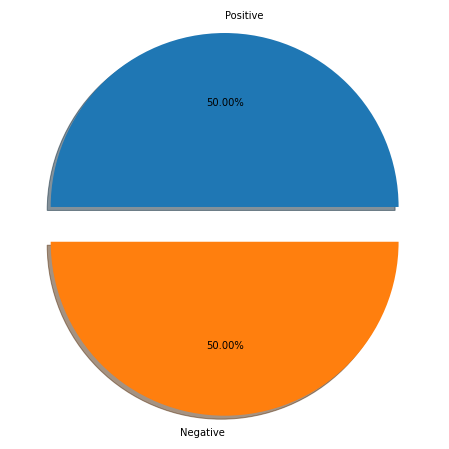

In [8]:
plt.pie(data.sentiment.value_counts()/len(data),
        labels =['Positive','Negative'],
        autopct='%1.2f%%',shadow=True,explode=(0.1, 0.1))

plt.show()

In [9]:
data.isna().sum()

review       0
sentiment    0
dtype: int64

In [10]:
df = data.copy()

In [11]:
from bs4 import BeautifulSoup

def preprocess_text(text):
  text = text.lower()
  soup = BeautifulSoup(text, 'lxml') # Remove HTML tags
  text = soup.get_text()

  text = unicodedata.normalize('NFKD',text).encode('ascii','ignore').decode('utf-8','ignore')

  return text

In [12]:
df['review'] = df.review.apply(preprocess_text) 

In [13]:
df['review'][1]

'a wonderful little production. the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. the actors are extremely well chosen- michael sheen not only "has got all the polari" but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. a masterful production about one of the great master\'s of comedy and his life. the realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. it plays on our knowledge and our senses, particularly with the scenes concerning orton and halliwell and the sets (particularly of their flat with halliwell\'s murals decorating every surface) are terribly well done.'

In [14]:
from contractions import contractions_dict

In [15]:
contractions_dict = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [16]:
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)
# Expanding Contractions in the reviews
df['review']=df['review'].apply(lambda x:expand_contractions(x))

In [17]:
df['review'][1]

'a wonderful little production. the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. the actors are extremely well chosen- michael sheen not only "has got all the polari" but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. a masterful production about one of the great master\'s of comedy and his life. the realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. it plays on our knowledge and our senses, particularly with the scenes concerning orton and halliwell and the sets (particularly of their flat with halliwell\'s murals decorating every surface) are terribly well done.'

In [18]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text




In [19]:
df['review']=df['review'].apply(remove_special_characters)

In [20]:
df['review'][11]

'i saw this movie when i was about 12 when it came out i recall the scariest scene was the big bird eating men dangling helplessly from parachutes right out of the air the horror the horroras a young kid going to these cheesy b films on saturday afternoons i still was tired of the formula for these monster type movies that usually included the hero a beautiful woman who might be the daughter of a professor and a happy resolution when the monster died in the end i did not care much for the romantic angle as a 12 year old and the predictable plots i love them now for the unintentional humorbut about a year or so later i saw psycho when it came out and i loved that the star janet leigh was bumped off early in the film i sat up and took notice at that point since screenwriters are making up the story make it up to be as scary as possible and not from a wellworn formula there are no rules'

In [21]:
import string

In [22]:
#remove punctuation
df['review']=df['review'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))

In [23]:
def remove_digits(text):
  res = ''.join([i for i in text if not i.isdigit()])
  return res

In [24]:
df['review']=df['review'].apply(remove_digits)

In [25]:
df['review'][1]

'a wonderful little production the filming technique is very unassuming very oldtimebbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great masters of comedy and his life the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwells murals decorating every surface are terribly well done'

In [26]:
#remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words.add('subject')
stop_words.add('http')
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
df['review']=df['review'].apply(lambda x: remove_stopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [43]:
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [46]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

In [35]:
# Tokenizing the tweet base texts.

df['tokenized'] = df['review'].apply(word_tokenize)


In [37]:
df.head()

,review,sentiment,tokenized
0,one reviewers mentioned watching oz episode sh...,positive,"[one, reviewers, mentioned, watching, oz, epis..."
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn..."
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,..."
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,..."


In [38]:
df['pos_tags'] = df['tokenized'].apply(nltk.tag.pos_tag)

df.head()


,review,sentiment,tokenized,pos_tags
0,one reviewers mentioned watching oz episode sh...,positive,"[one, reviewers, mentioned, watching, oz, epis...","[(one, CD), (reviewers, NNS), (mentioned, VBD)..."
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...","[(wonderful, JJ), (little, JJ), (production, N..."
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...","[(thought, VBN), (wonderful, JJ), (way, NN), (..."
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,...","[(basically, RB), (family, NN), (little, JJ), ..."
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,...","[(petter, NN), (matteis, RBS), (love, JJ), (ti..."


In [44]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


df['wordnet_pos'] = df['pos_tags'].apply(
    lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

df.head()

,review,sentiment,tokenized,pos_tags,wordnet_pos
0,one reviewers mentioned watching oz episode sh...,positive,"[one, reviewers, mentioned, watching, oz, epis...","[(one, CD), (reviewers, NNS), (mentioned, VBD)...","[(one, n), (reviewers, n), (mentioned, v), (wa..."
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...","[(wonderful, JJ), (little, JJ), (production, N...","[(wonderful, a), (little, a), (production, n),..."
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...","[(thought, VBN), (wonderful, JJ), (way, NN), (...","[(thought, v), (wonderful, a), (way, n), (spen..."
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,...","[(basically, RB), (family, NN), (little, JJ), ...","[(basically, r), (family, n), (little, a), (bo..."
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,...","[(petter, NN), (matteis, RBS), (love, JJ), (ti...","[(petter, n), (matteis, r), (love, a), (time, ..."


In [47]:
# Applying word lemmatizer.

wnl = WordNetLemmatizer()

df['lemmatized'] = df['wordnet_pos'].apply(
    lambda x: [wnl.lemmatize(word, tag) for word, tag in x])

df['lemmatized'] = df['lemmatized'].apply(
    lambda x: [word for word in x if word not in stop_words])

df['lemma_str'] = [' '.join(map(str, l)) for l in df['lemmatized']]

df.head()

,review,sentiment,tokenized,pos_tags,wordnet_pos,lemmatized,lemma_str
0,one reviewers mentioned watching oz episode sh...,positive,"[one, reviewers, mentioned, watching, oz, epis...","[(one, CD), (reviewers, NNS), (mentioned, VBD)...","[(one, n), (reviewers, n), (mentioned, v), (wa...","[one, reviewer, mention, watch, oz, episode, s...",one reviewer mention watch oz episode shall ho...
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...","[(wonderful, JJ), (little, JJ), (production, N...","[(wonderful, a), (little, a), (production, n),...","[wonderful, little, production, film, techniqu...",wonderful little production film technique una...
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...","[(thought, VBN), (wonderful, JJ), (way, NN), (...","[(thought, v), (wonderful, a), (way, n), (spen...","[think, wonderful, way, spend, time, hot, summ...",think wonderful way spend time hot summer week...
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,...","[(basically, RB), (family, NN), (little, JJ), ...","[(basically, r), (family, n), (little, a), (bo...","[basically, family, little, boy, jake, think, ...",basically family little boy jake think zombie ...
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,...","[(petter, NN), (matteis, RBS), (love, JJ), (ti...","[(petter, n), (matteis, r), (love, a), (time, ...","[petter, matteis, love, time, money, visually,...",petter matteis love time money visually stunni...


In [49]:
df_mod = df[["lemma_str", "sentiment"]]
df_mod.head()

,lemma_str,sentiment
0,one reviewer mention watch oz episode shall ho...,positive
1,wonderful little production film technique una...,positive
2,think wonderful way spend time hot summer week...,positive
3,basically family little boy jake think zombie ...,negative
4,petter matteis love time money visually stunni...,positive


In [50]:
df_train, df_test = train_test_split(df_mod, test_size=1- 0.8, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))


TRAIN size: 40000
TEST size: 10000


In [51]:
%%time
documents = [text.split() for text in df_train.lemma_str] 

CPU times: user 462 ms, sys: 164 ms, total: 626 ms
Wall time: 1.05 s


In [53]:
# Parameters for WORD2VEC
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10

In [58]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
# Warnings
import warnings 
warnings.filterwarnings('ignore')

In [60]:
w2v_model = gensim.models.word2vec.Word2Vec(size=W2V_SIZE, 
                                            window=W2V_WINDOW, 
                                            min_count=W2V_MIN_COUNT, 
                                            workers=8)

In [61]:
w2v_model.build_vocab(documents)

In [63]:
# words = w2v_model.wv.key_to_index.keys()
# vocab_size = len(words)
# print("Vocab size", vocab_size)

In [64]:
%%time
w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

CPU times: user 10min 42s, sys: 2.73 s, total: 10min 44s
Wall time: 5min 35s


(130483767, 149032928)

In [73]:
w2v_model.wv.most_similar("fantasy")

[('fairytale', 0.37421637773513794),
 ('surreal', 0.36971646547317505),
 ('dream', 0.3576681613922119),
 ('trippy', 0.3323534429073334),
 ('imagination', 0.33005833625793457),
 ('surrealism', 0.3209266662597656),
 ('fable', 0.32046395540237427),
 ('fantastical', 0.31386807560920715),
 ('heady', 0.3136986494064331),
 ('metaphor', 0.31277820467948914)]

In [75]:
%%time
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.lemma_str)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 174595
CPU times: user 3.54 s, sys: 40 ms, total: 3.58 s
Wall time: 3.63 s


In [77]:
# Parameters related to KERAS
SEQUENCE_LENGTH = 300
EPOCHS = 8
BATCH_SIZE = 1024

In [78]:
%%time
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.lemma_str), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.lemma_str), maxlen=SEQUENCE_LENGTH)

CPU times: user 3.19 s, sys: 61.2 ms, total: 3.25 s
Wall time: 3.34 s


In [79]:
# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.metrics import f1_score, accuracy_score

In [82]:
encoder = LabelEncoder()
encoder.fit(df_train.sentiment.tolist())

y_train = encoder.transform(df_train.sentiment.tolist())
y_test = encoder.transform(df_test.sentiment.tolist())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (40000, 1)
y_test (10000, 1)


In [83]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print()
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (40000, 300)
y_train (40000, 1)

x_test (10000, 300)
y_test (10000, 1)


In [84]:
y_train[:10]

array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]])

In [85]:
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(174595, 300)


In [86]:
embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)

In [87]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 300)          52378500  
                                                                 
 dropout (Dropout)           (None, 300, 300)          0         
                                                                 
 lstm (LSTM)                 (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 52,539,001
Trainable params: 160,501
Non-trainable params: 52,378,500
_________________________________________________________________


In [88]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [89]:
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [90]:
%%time
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/8
36/36 [==============================] - ETA: 0s - loss: 0.5713 - accuracy: 0.6921

36/36 [==============================] - 57s 1s/step - loss: 0.5713 - accuracy: 0.6921 - val_loss: 0.6367 - val_accuracy: 0.7987 - lr: 0.0010
Epoch 2/8
36/36 [==============================] - ETA: 0s - loss: 0.4399 - accuracy: 0.8006

36/36 [==============================] - 48s 1s/step - loss: 0.4399 - accuracy: 0.8006 - val_loss: 0.4314 - val_accuracy: 0.8303 - lr: 0.0010
Epoch 3/8
36/36 [==============================] - ETA: 0s - loss: 0.3982 - accuracy: 0.8274

36/36 [==============================] - 49s 1s/step - loss: 0.3982 - accuracy: 0.8274 - val_loss: 0.4710 - val_accuracy: 0.7880 - lr: 0.0010
Epoch 4/8
36/36 [==============================] - ETA: 0s - loss: 0.3842 - accuracy: 0.8341

36/36 [==============================] - 47s 1s/step - loss: 0.3842 - accuracy: 0.8341 - val_loss: 0.3694 - val_accuracy: 0.8545 - lr: 0.0010
Epoch 5/8
36/36 [==============================] - ETA: 0s - loss: 0.3587 - accuracy: 0.8478

36/36 [==============================] - 49s 1s/step - loss: 0.3587 - accuracy: 0.8478 - val_loss: 0.3401 - val_accuracy: 0.8662 - lr: 0.0010
Epoch 6/8
36/36 [==============================] - ETA: 0s - loss: 0.3303 - accuracy: 0.8619

36/36 [==============================] - 48s 1s/step - loss: 0.3303 - accuracy: 0.8619 - val_loss: 0.3403 - val_accuracy: 0.8677 - lr: 0.0010
Epoch 7/8
36/36 [==============================] - ETA: 0s - loss: 0.3212 - accuracy: 0.8653

36/36 [==============================] - 47s 1s/step - loss: 0.3212 - accuracy: 0.8653 - val_loss: 0.3508 - val_accuracy: 0.8643 - lr: 0.0010
Epoch 8/8
36/36 [==============================] - ETA: 0s - loss: 0.3153 - accuracy: 0.8679

36/36 [==============================] - 48s 1s/step - loss: 0.3153 - accuracy: 0.8679 - val_loss: 0.2981 - val_accuracy: 0.8773 - lr: 0.0010
CPU times: user 9min 10s, sys: 1min 12s, total: 10min 23s
Wall time: 7min 24s


In [91]:
%%time
score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

10/10 [==============================] - 1s 110ms/step - loss: 0.3026 - accuracy: 0.8762

ACCURACY: 0.8762000203132629
LOSS: 0.30256789922714233
CPU times: user 1.16 s, sys: 72.2 ms, total: 1.23 s
Wall time: 1.25 s


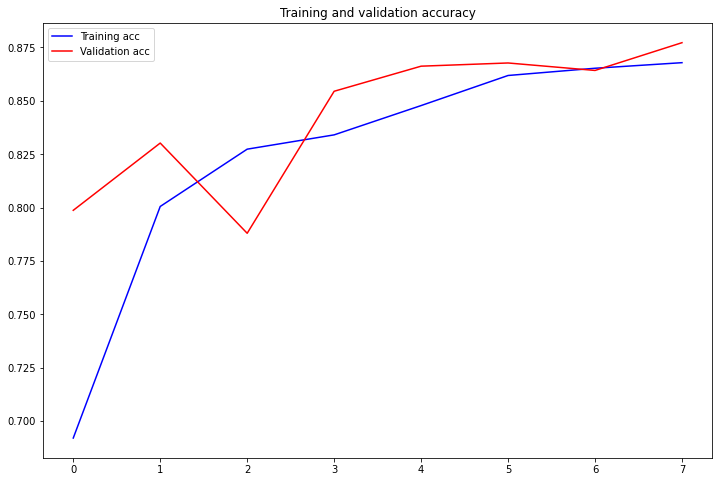

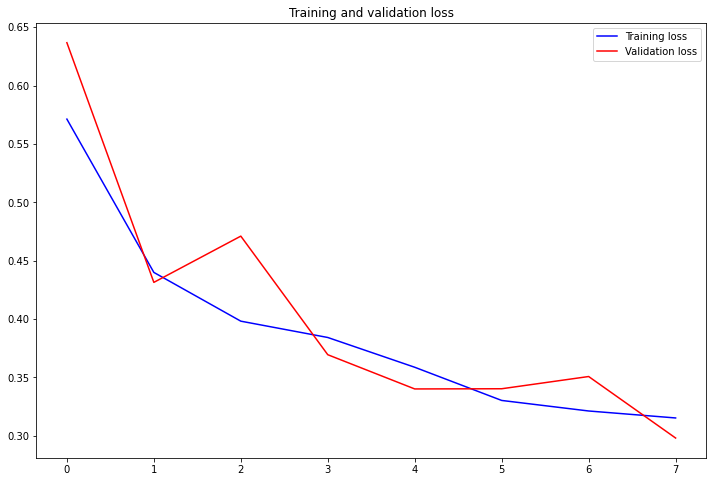

In [92]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [94]:

# Variable specific to SENTIMENT
POSITIVE = "POSITIVE"
NEGATIVE = "NEGATIVE"
NEUTRAL = "NEUTRAL"
SENTIMENT_THRESHOLDS = (0.4, 0.7)

In [95]:
def decode_sentiment(score, include_neutral=True):
    if include_neutral:        
        label = NEUTRAL ### Whatever not coming in negative and positive sentiments has been considered as neutral
        if score <= SENTIMENT_THRESHOLDS[0]:
            label = NEGATIVE
        elif score >= SENTIMENT_THRESHOLDS[1]:
            label = POSITIVE

        return label
    else:
        return NEGATIVE if score < 0.5 else POSITIVE

In [96]:
# Utility
import string
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools
import random
import datetime

In [97]:
def predict(clean_text, include_neutral=True):
    start_at = time.time()
    # Tokenize clean_text
    x_test = pad_sequences(tokenizer.texts_to_sequences([clean_text]), maxlen=SEQUENCE_LENGTH)
    # Predict
    score = model.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiment(score, include_neutral=include_neutral)

    return {"label": label, "score": float(score),
       "elapsed_time": time.time()-start_at}  

In [100]:
predict("I have nothing to lose")

{'label': 'NEUTRAL',
 'score': 0.4412718713283539,
 'elapsed_time': 0.39299917221069336}

In [101]:
predict("Experience has been bad")

{'label': 'NEGATIVE',
 'score': 0.2085421234369278,
 'elapsed_time': 0.1146845817565918}

In [104]:
%%time
y_pred_1d = []
y_test_1d = list(df_test.sentiment)
scores = model.predict(x_test, verbose=1, batch_size=8000)
y_pred_1d = [decode_sentiment(score, include_neutral=False) for score in scores]

2/2 [==============================] - 1s 190ms/step
CPU times: user 879 ms, sys: 324 ms, total: 1.2 s
Wall time: 1.72 s
